In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import glob
from tidegauge_functions import read_GPS_SONEL

%matplotlib inline

In [2]:
datum = '?????'
ext = '.neu'
dir_in = 'data/GPS'

In [3]:
pattern = os.path.join(dir_in, 'd*' + datum + ext)
print(pattern)

data/GPS/d*?????.neu


In [4]:
filenames = sorted(glob.glob(pattern))  # , key=alphanum_key)

In [5]:
for f, filepath in enumerate(filenames):
    df = read_GPS_SONEL(filepath)
    print(f'\n\n{filepath}')
    print(df.head())



data/GPS/dAB44_99999X006_ULR6B.neu
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD
Year                                                             
2005-08-15  -13.4 -11.4      16.3       4.3      3.7         10.3
2005-08-16  -12.0 -12.5      13.7       3.9      3.5          9.5
2005-08-17  -14.2 -13.7      18.5       3.8      3.3         10.0
2005-08-18  -12.4 -13.2      19.6       3.7      3.3          9.5
2005-08-19  -13.2 -11.6      22.9       4.8      4.0         10.6


data/GPS/dAB48_XXXXXXXXX_JPL14.neu
            North   East  Vertical  NorthSTD  EastSTD  VerticalSTD
Year                                                              
2005-10-06  314.5  262.3     -67.3       1.2      0.7          3.7
2005-10-07  313.4  266.7     -65.5       1.1      0.7          3.3
2005-10-08  313.9  262.7     -63.4       1.0      0.6          3.2
2005-10-09  315.5  265.1     -64.0       1.0      0.6          3.2
2005-10-10  316.3  265.4     -64.7       1.1      0.7         

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df, var, site, period):  
    
    decomposition = seasonal_decompose(df[var], freq = period)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    Amplitude = max(seasonal) - min(seasonal)
    
    decomposition.plot();
    df['denoised'] = df[var] - residual
    df['trend'] = trend
    print(f'\n\n{filepath}')
    print(df.head())
    print(f'{site} Seasonal Amplitude =', Amplitude)
    seasonal_amp = pd.DataFrame(list(zip(list({site}), list(Amplitude))),
                            colums = ['Site_Name', 'Seasonal_Amplitude'])
    seasonal_amp.to_csv('GPS_Seasonal_Amplitude_SONEL')

# Change Point Detection
def change_pt_detection(df, var, points):
    model = "l1"  
    algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
    my_bkps = algo.predict(n_bkps=10)

    
def change_pt_plot()
    rpt.show.display(points, my_bkps, figsize=(10, 6))
    plt.suptitle(f"{site}Change Point Detection")
    plt.show()

In [7]:
def test_calc_OLS(df, var):
    
    x, y = np.arange(len(df[var].dropna())), df[var].dropna()
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    res = model.fit()
    return res

def test_plot_OLS(df, res, site, var, trend_array):
    fig, ax = plt.subplots(1, 1, figsize=(12,6));
    ax.plot(df[var].dropna().index, df[var].dropna().values, 
            label='trend', marker='.', linestyle='')
    ax.plot(df[var].dropna().index, [res.params.x1*i + res.params.const for i in np.arange(len(df[var].dropna()))])
    # ax[1].plot(df['Vertical'].dropna().index, res.resid.values);
    # ax[1].plot(df['Vertical'].dropna().index, np.abs(res.resid.values));
    # ax[1].hlines(0, 0, len(res.resid), color='k');
    ax.set_title(f"Trend = {trend_array * 1:.2f} mm/yr");
    # ax[1].set_title("Residuals");
    plt.suptitle(f"{site}")
    plt.savefig(f'figs/test_GPS_OLS_{site}.png')
    
    



data/GPS/dAB44_99999X006_ULR6B.neu
f: 0


data/GPS/dAB44_99999X006_ULR6B.neu
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                          
2005-08-15  -13.4 -11.4      16.3       4.3      3.7         10.3       NaN   
2005-08-16  -12.0 -12.5      13.7       3.9      3.5          9.5       NaN   
2005-08-17  -14.2 -13.7      18.5       3.8      3.3         10.0       NaN   
2005-08-18  -12.4 -13.2      19.6       3.7      3.3          9.5       NaN   
2005-08-19  -13.2 -11.6      22.9       4.8      4.0         10.6       NaN   

            trend  
Year               
2005-08-15    NaN  
2005-08-16    NaN  
2005-08-17    NaN  
2005-08-18    NaN  
2005-08-19    NaN  
AB44 Seasonal Amplitude = 27.4971819960861


/Users/dporter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


TypeError: 'float' object is not iterable

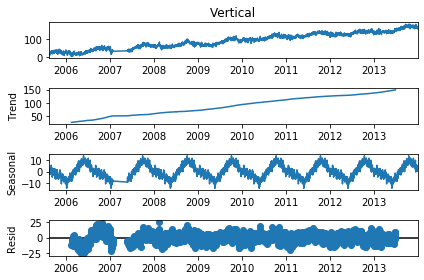

In [8]:
for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    df = read_GPS_SONEL(filepath)
    df = decompose(df, 'Vertical', filepath[-24:-20], 365)
    

In [9]:
def convert_trend_toyearly(df, res):
    period = df.index.year.value_counts().max()
    yearlytrend = res.params.x1 * period
    
    return yearlytrend

In [10]:
sonel_trend_array = np.full(np.shape(filenames)[0], np.nan)
site_name_array = []


for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    ## ToDo - extract and keep other important thing about each site from the file...Lat/Lon, name, etc.
    
    # Read in data
    df = read_GPS_SONEL(filepath)
    
    
    # Get trend using linear regression
    res = test_calc_OLS(df, 'Vertical')
    sonel_trend_array[f] = convert_trend_toyearly(df, res)
    
    
    # Save site name
    site_name_array.append(filepath[-24:-20])
    
   # print(f"Trend = {sonel_trend_array[f] * 1:.2f} mm/yr")
    
#     print(res.summary())
   # np.savetxt('GPS_trend.csv', {sonel_trend_array[f] * 365:.2f}, delimiter=',')
    # Make Plot
    #test_plot_OLS(df, res, filepath[-24:-20], 'Vertical', sonel_trend_array[f])
    
    



data/GPS/dAB44_99999X006_ULR6B.neu
f: 0


data/GPS/dAB48_XXXXXXXXX_JPL14.neu
f: 1


data/GPS/dAB50_99999X007_ULR6B.neu
f: 2


data/GPS/dAKSE_XXXXXXXXX_NGL14.neu
f: 3


data/GPS/dAKSI_XXXXXXXXX_NGL14.neu
f: 4


data/GPS/dANC2_XXXXXXXXX_NGL14.neu
f: 5


data/GPS/dCHUR_40128M002_ULR6B.neu
f: 6


data/GPS/dEYAC_99999X043_ULR6B.neu
f: 7


data/GPS/dJNU1_49519S001_NGL14.neu
f: 8


data/GPS/dKEN5_XXXXXXXXX_NGL14.neu
f: 9


data/GPS/dNUUK_43013M001_NGL14.neu
f: 10


data/GPS/dQAQ1_43007M001_ULR6B.neu
f: 11


data/GPS/dSCOR_43006M002_ULR6B.neu
f: 12


data/GPS/dTBON_XXXXXXXXX_NGL14.neu
f: 13


data/GPS/dTHU1_43001M001_ULR6B.neu
f: 14


data/GPS/dTHU2_43001M002_ULR6B.neu
f: 15


data/GPS/dTHU3_43001M002_ULR6B.neu
f: 16


In [11]:
str(filenames)

"['data/GPS/dAB44_99999X006_ULR6B.neu', 'data/GPS/dAB48_XXXXXXXXX_JPL14.neu', 'data/GPS/dAB50_99999X007_ULR6B.neu', 'data/GPS/dAKSE_XXXXXXXXX_NGL14.neu', 'data/GPS/dAKSI_XXXXXXXXX_NGL14.neu', 'data/GPS/dANC2_XXXXXXXXX_NGL14.neu', 'data/GPS/dCHUR_40128M002_ULR6B.neu', 'data/GPS/dEYAC_99999X043_ULR6B.neu', 'data/GPS/dJNU1_49519S001_NGL14.neu', 'data/GPS/dKEN5_XXXXXXXXX_NGL14.neu', 'data/GPS/dNUUK_43013M001_NGL14.neu', 'data/GPS/dQAQ1_43007M001_ULR6B.neu', 'data/GPS/dSCOR_43006M002_ULR6B.neu', 'data/GPS/dTBON_XXXXXXXXX_NGL14.neu', 'data/GPS/dTHU1_43001M001_ULR6B.neu', 'data/GPS/dTHU2_43001M002_ULR6B.neu', 'data/GPS/dTHU3_43001M002_ULR6B.neu']"

In [12]:
def get_SONEL_Lat(filenames):
    with open(filenames, "r") as f:
        for line in f:
            if 'Latitude' in line:
                lat = line.split(':')[1].split(' ')[3]
    return lat

In [13]:
def get_SONEL_Lon(filenames):
    with open(filenames, "r") as f:
        for line in f:
            if 'Longitude' in line:
                lon = line.split(':')[1].split(' ')[3]

    return lon

In [14]:
def get_SONEL_Height(filenames):
    with open(filenames, "r") as f:
        for line in f:            
            if 'Height' in line:
                height = line.split(':')[1].split(' ')[3]
    
    return height

In [15]:
sonel_Lat_array = np.full(np.shape(filenames)[0], np.nan)
sonel_Lon_array = np.full(np.shape(filenames)[0], np.nan)
for f, filepath in enumerate(filenames):
    sonel_Lat_array[f] = get_SONEL_Lat(filenames[f])
    sonel_Lon_array[f] = get_SONEL_Lon(filenames[f])
    sonel_Height_array[f] = get_SONEL_Height(filenames[f])


ValueError: could not convert string to float: 

In [19]:
from tidegauge_functions import get_SONEL_headerinfo

sonel_SiteID_array = []
# sonel_Lat_array = []
sonel_Lat_array = np.full(np.shape(filenames)[0], np.nan)
sonel_Lon_array = np.full(np.shape(filenames)[0], np.nan)
sonel_Height_array = np.full(np.shape(filenames)[0], np.nan)


for f, filepath in enumerate(filenames):
    a,b,c,d = get_SONEL_headerinfo(filenames[f])
    print('\n',a,b,c,d)
    temp_name, sonel_Lon_array[f], sonel_Lat_array[f], sonel_Height_array[f] = \
        get_SONEL_headerinfo(filenames[f])
#     temp_name, temp_lat, temp_lon, temp_height = get_SONEL_headerinfo(filenames[f])
    print(temp_lat)
    sonel_SiteID_array.append(temp_name)
#     sonel_Lat_array.append(temp_lat)

print(sonel_SiteID_array.append(temp_name))
print(sonel_Lat_array.append(temp_lat))

# Site ID: AB44


 AB44 59.52803911 -135.22829744 304.0995
# Site ID: AB44

76.53704754
# Site ID: AB48


 AB48 56.24505997 -134.64700034 5.331
# Site ID: AB48

76.53704754
# Site ID: AB50


 AB50 58.41677591 -134.54530025 51.4695
# Site ID: AB50

76.53704754
# Site ID: AKSE


 AKSE 60.13249764 -149.43648824 44.359
# Site ID: AKSE

76.53704754
# Site ID: AKSI


 AKSI 57.04886058 -135.33898525 19.914
# Site ID: AKSI

76.53704754
# Site ID: ANC2


 ANC2 61.17522442 -149.98344307 57.883
# Site ID: ANC2

76.53704754
# Site ID: CHUR


 CHUR 58.75907776 -94.08872764 -19.3604
# Site ID: CHUR

76.53704754
# Site ID: EYAC


 EYAC 60.54870384 -145.74985747 146.0126
# Site ID: EYAC

76.53704754
# Site ID: JNU1


 JNU1 58.36257477 -134.58570662 15.646
# Site ID: JNU1

76.53704754
# Site ID: KEN5


 KEN5 60.67507812 -151.35018263 56.324
# Site ID: KEN5

76.53704754
# Site ID: NUUK


 NUUK 64.18355313 -51.73116095 109.368
# Site ID: NUUK

76.53704754
# Site ID: QAQ1


 QAQ1 60.71526339 -46.04776278 

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [22]:
print(sonel_Lat_array)
print(sonel_Lon_array)

[-135.22829744 -134.64700034 -134.54530025 -149.43648824 -135.33898525
 -149.98344307  -94.08872764 -145.74985747 -134.58570662 -151.35018263
  -51.73116095  -46.04776278  -21.95033614 -149.78514271  -68.78801297
  -68.82503642  -68.82503642]
[59.52803911 56.24505997 58.41677591 60.13249764 57.04886058 61.17522442
 58.75907776 60.54870384 58.36257477 60.67507812 64.18355313 60.71526339
 70.48533354 61.17971547 76.53733733 76.53704754 76.53704754]


In [23]:
#Write CSV trend array
columns = ['SITE', 'LAT', 'LON', 'Height', 'TREND_Vertical']
out_array = np.array([site_name_array, sonel_Lat_array, sonel_Lon_array,sonel_Height_array, sonel_trend_array])

df = pd.DataFrame(data=out_array.T, columns=columns) #, index=time)
df = df.apply(pd.to_numeric, errors='ignore')
# df.index = pd.to_datetime(trajectory.index)
df.to_csv('data/trends_OLS_SONEL.csv')  # , na_rep=" ")